In [60]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [61]:
pho = pd.read_csv("phoneme.csv")
pho.head(n=10)

,Aa,Ao,Dcl,Iy,Sh,class
0,1.240,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.300,1.041,0.559,0
3,0.279,0.990,2.555,-0.738,0.000,0
4,0.307,1.272,2.656,-0.946,-0.467,0
5,0.960,0.712,-0.143,0.091,-0.061,0
6,2.941,0.657,1.493,-0.331,-0.123,0
7,0.401,1.159,2.064,-0.690,-0.308,0
8,0.229,1.748,0.634,0.259,0.000,0
9,0.303,0.609,0.474,1.427,-0.811,1


In [62]:
print(pho.columns[:-1])

Index(['Aa', 'Ao', 'Dcl', 'Iy', 'Sh'], dtype='object')


In [63]:
pho.describe()

,Aa,Ao,Dcl,Iy,Sh,class
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,0.818957,1.258802,0.764732,0.398743,0.078619,0.293486
std,0.858733,0.851057,0.925436,0.796531,0.575624,0.455401
min,-1.700000,-1.327000,-1.823000,-1.581000,-1.284000,0.000000
25%,0.243750,0.596000,-0.115000,-0.205000,-0.232250,0.000000
50%,0.492500,1.075500,0.729000,0.285500,-0.044000,0.000000
75%,1.089250,1.866250,1.484000,0.937000,0.196250,1.000000
max,4.107000,4.378000,3.199000,2.826000,2.719000,1.000000


In [93]:
X = pho[pho.columns[:-1]] # 属性の最初から最後の手前までを抽出 [Aa ~ Sh]
y = pho[pho.columns[-1]] # 属性の最後を抽出 [class]

X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
print(pho.shape)
print(X)

(5404, 6)
[[ 1.24   0.875 -0.205 -0.078  0.067]
 [ 0.268  1.352  1.035 -0.332  0.217]
 [ 1.567  0.867  1.3    1.041  0.559]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671]
 [ 0.15   0.933  2.363 -0.742 -0.617]
 [ 0.137  0.714  1.35   0.972 -0.63 ]]


In [95]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

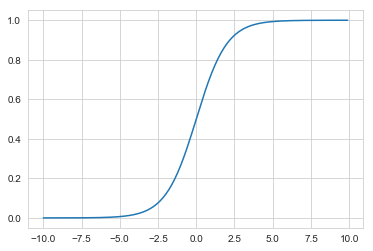

In [96]:
sigmoid_x = np.arange(-10, 10, 0.1)
sigmoid_y = sigmoid(sigmoid_x)
plt.plot(sigmoid_x, sigmoid_y)

In [97]:
# learning
clf = LogisticRegression(penalty='l2', C=100, random_state=42)
clf.fit(X, y)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

C:\Users\Owner\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
# show probability
for i in range(5):
    print(round(y_proba[i, 0], 3), round(y_proba[i, 1], 3))

0.887 0.113
0.69 0.31
0.431 0.569
0.801 0.199
0.648 0.352


In [99]:
# evaluation
confusion_matrix(y_test, y_pred)

array([[673,  94],
       [168, 146]], dtype=int64)

In [100]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.757631822386679


In [101]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       767
           1       0.61      0.46      0.53       314

   micro avg       0.76      0.76      0.76      1081
   macro avg       0.70      0.67      0.68      1081
weighted avg       0.74      0.76      0.75      1081



In [102]:
# analyze results
print('y = {} * x + {}'.format(clf.coef_, clf.intercept_))

y = [[-0.61018081 -0.40557713  0.67207247  0.78811334  0.54116684]] * x + [-1.06466354]


In [103]:
coef_df = pd.DataFrame([pho.columns[:-1],
                        clf.coef_.flatten()], index=['features', 'coef']).T

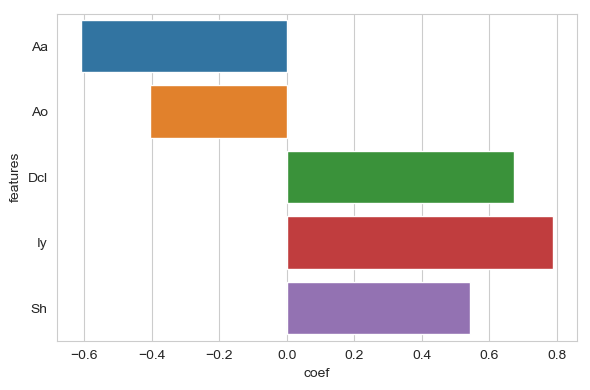

In [104]:
plt.figure(dpi=100)
sns.barplot(x=coef_df['coef'], y=coef_df['features'])
plt.tight_layout()

In [105]:
logreg = LogisticRegression()
# 交差検証
scores = cross_val_score(logreg, X, y, cv=5)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.74121996 0.76318224 0.75115634 0.7537037  0.7462963 ]
Average score: 0.7511117076849156


C:\Users\Owner\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [106]:
odds = np.exp(clf.coef_).flatten()
odds_df = pd.DataFrame([pho.columns[:-1], odds], index=['features', 'odds']).T

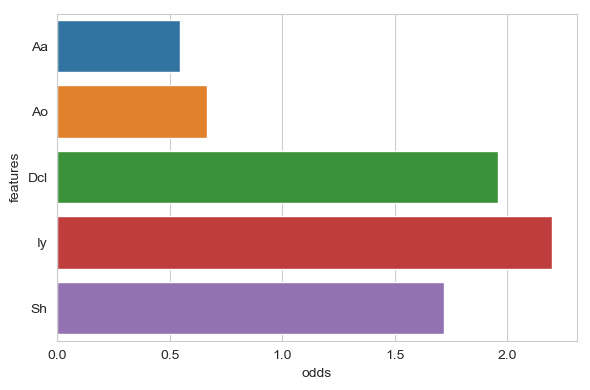

In [107]:
plt.figure(dpi=100)
sns.barplot(x=odds_df['odds'], y=odds_df['features'])
plt.tight_layout()